# Молекулярні орбіталі та радіальна функція розподілу (RDF)

## 1. Молекулярні орбіталі (MO)

У методах типу Hartree-Fock (HF) або DFT хвильова функція електрона виражається через **молекулярні орбіталі**:

$$
\psi_j(\mathbf r) = \sum_{\mu} C_{\mu j} \, \chi_\mu(\mathbf r)
$$

де:

- $\psi_j(\mathbf r)$ — $j$-та молекулярна орбіталь,  
- $C_{\mu j}$ — коефіцієнти розкладу МО по атомних орбіталях (AO),  
- $\chi_\mu(\mathbf r)$ — атомні орбіталі (лінійна комбінація гауссових функцій).  

Електронна густина системи обчислюється як сума квадратів заповнених МО:

$$
\rho(\mathbf r) = \sum_{j} n_j \, |\psi_j(\mathbf r)|^2
$$

де $n_j$ — число електронів у $j$-й МО (заповненість).

---

## 2. Радіальна функція розподілу (RDF)

Для атома або сферично симетричної системи часто цікавить **радіальна густина** $\rho(r)$, усереднена по кутам:

$$
\rho(r) = \frac{1}{4\pi} \int |\psi(\mathbf r)|^2 \, d\Omega
$$

де $d\Omega$ — елемент поверхні сфери.  

**Радіальна функція розподілу (RDF):**

$$
P(r) = 4 \pi r^2 \, \rho(r)
$$

- Показує, як електронна густина розподілена по радіусах,  
- Піки $P(r)$ відповідають електронним оболонкам (наприклад, 1s, 2s у літію).  

**Обчислення на сітці:**

1. Створюється радіальна сітка $r_i$ навколо ядра.  
2. Обчислюється $\psi_j(\mathbf r_i)$ через розклад по AO.  
3. Густина: $\rho(\mathbf r_i) = \sum_j n_j |\psi_j(\mathbf r_i)|^2$.  
4. Усереднення по кутам (для s-симетрії можна брати пряму лінію):  
   $\rho(r_i) = \langle \rho(\mathbf r_i) \rangle_\Omega$.  
5. RDF: $P(r_i) = 4 \pi r_i^2 \rho(r_i)$.  


In [1]:
from pyscf import gto, scf, dft
from pyscf.tools import molden
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Задаём молекулу
mol = gto.M(atom='''
            Ar  0.000000  0.000000  0.000000
            ''',
    basis = 'sto3g',
    charge=0,
    spin=0,
    verbose=0
)

In [3]:
# RHF расчёт
mf = scf.RHF(mol)
mf.conv_tol = 1e-10
mf.max_cycle = 100
mf.kernel()

np.float64(-521.2228808035305)

In [4]:
# Извлекаем данные
mo_energy = mf.mo_energy
mo_occ = mf.mo_occ
mo_coeff = mf.mo_coeff
ao_labels = mol.ao_labels()

In [5]:
mo_occ

array([2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [6]:
columns_multiindex = pd.MultiIndex.from_arrays([
    range(len(ao_labels)),  # первый уровень: 0, 1, 2, 3, 4
    mo_energy,
    mo_occ,
], names=['MO_Index', 'Orbiral Energy', 'OCC'])

In [7]:
df = pd.DataFrame(mo_coeff, 
                  columns=columns_multiindex,
                  index=ao_labels)

In [8]:
df

MO_Index,0,1,2,3,4,5,6,7,8
Orbiral Energy,-117.263218,-12.054866,-9.308431,-9.308431,-9.308431,-1.154432,-0.495941,-0.495941,-0.495941
OCC,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
0 Ar 1s,0.994656,-0.385435,0.000000e+00,-0.000000e+00,0.000000e+00,0.096717,-0.000000e+00,0.000000e+00,-0.000000e+00
0 Ar 2s,0.014995,1.055832,0.000000e+00,-0.000000e+00,0.000000e+00,-0.311810,-0.000000e+00,0.000000e+00,-0.000000e+00
0 Ar 3s,-0.001543,0.043685,0.000000e+00,-0.000000e+00,0.000000e+00,1.029904,-0.000000e+00,0.000000e+00,0.000000e+00
0 Ar 2px,-0.000000,-0.000000,0.000000e+00,9.902472e-01,0.000000e+00,0.000000,-2.896753e-01,1.762277e-18,-2.753558e-20
0 Ar 2py,-0.000000,0.000000,9.902472e-01,-4.717976e-20,2.753544e-15,0.000000,-1.314532e-18,-2.895808e-01,7.399583e-03
0 Ar 2pz,-0.000000,-0.000000,-2.796044e-15,-0.000000e+00,9.902472e-01,0.000000,-0.000000e+00,-7.399583e-03,-2.895808e-01
0 Ar 3px,-0.000000,0.000000,0.000000e+00,3.700651e-02,0.000000e+00,0.000000,1.031083e+00,-7.159181e-18,1.118622e-19
0 Ar 3py,-0.000000,0.000000,3.700651e-02,1.916659e-19,2.290938e-16,0.000000,5.340233e-18,1.030746e+00,-2.633839e-02


In [9]:
# Создаём одномерную сетку вдоль оси x
n_points = 1000
x = np.linspace(0, 5, n_points)
coords = np.zeros((n_points, 3))
coords[:, 0] = x
ao_values = mol.eval_gto('GTOval_sph', coords)


In [10]:
mo_values = ao_values @ mo_coeff 

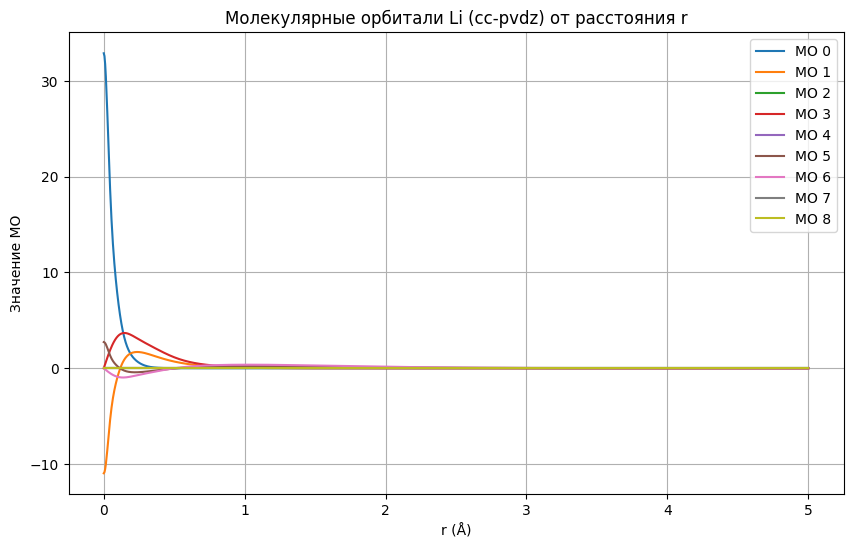

In [11]:
# График всех МО
plt.figure(figsize=(10, 6))
for i in range(len(np.where(mo_occ > 0)[0])):  # Проходим по всем столбцам
    plt.plot(x, mo_values[:, i], label=f'MO {i}')
plt.xlabel('r (Å)')
plt.ylabel('Значение МО')
plt.title('Молекулярные орбитали Li (cc-pvdz) от расстояния r')
plt.legend()
plt.grid()
plt.show()

In [12]:
# электронная плотность
density = (np.abs(mo_values)**2) @ mo_occ 

In [13]:
# ---- 3. Угловая сетка (случайные направления) ----
def random_sphere_directions(n_points):
    phi = 2 * np.pi * np.random.rand(n_points)
    cos_theta = 2 * np.random.rand(n_points) - 1
    sin_theta = np.sqrt(1 - cos_theta**2)
    x = sin_theta * np.cos(phi)
    y = sin_theta * np.sin(phi)
    z = cos_theta
    return np.vstack([x, y, z]).T  # (n_points, 3)

n_dirs = 200
r_grid = np.linspace(0.0, 5.0, n_points)
directions = random_sphere_directions(n_dirs)

# ---- 4. Усреднение по углам ----
rdf = np.zeros_like(r_grid)
for i, r in enumerate(r_grid):
    coords = r * directions  # точки на сфере радиуса r
    ao_values = mol.eval_gto("GTOval_sph", coords)       # (n_dirs, n_ao)
    mo_values = ao_values @ mo_coeff                     # (n_dirs, n_mo)
    dens = (np.abs(mo_values)**2) @ mo_occ               # (n_dirs,)
    # усреднение по углам
    rho_avg = dens.mean()
    rdf[i] = 4 * np.pi * r**2 * rho_avg


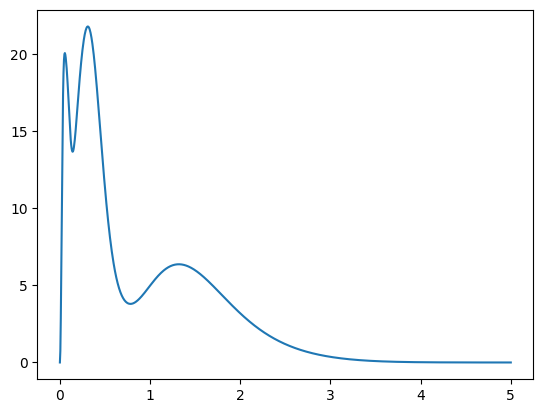

In [14]:
plt.plot(x, rdf)
plt.show()